In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Mounted at /content/drive


Load Data

In [ ]:
train_ds = tf.data.Dataset.load('/content/drive/MyDrive/207/train_ds')
val_ds = tf.data.Dataset.load('/content/drive/MyDrive/207/val_ds')
test_ds = tf.data.Dataset.load('/content/drive/MyDrive/207/test_ds')

In [ ]:
train_binary = pd.read_csv('/content/drive/MyDrive/207/train_binary.csv')
val_binary = pd.read_csv('/content/drive/MyDrive/207/val_binary.csv')
test_binary = pd.read_csv('/content/drive/MyDrive/207/test_binary.csv')

In [ ]:
X_train = train_binary['0']
X_val = val_binary['0']
X_test = test_binary['0']

In [ ]:
y_train = pd.read_csv('/content/drive/MyDrive/207/y_train.csv')
y_val = pd.read_csv('/content/drive/MyDrive/207/y_val.csv')
y_test = pd.read_csv('/content/drive/MyDrive/207/y_test.csv')

In [ ]:
#Prepare data for bag of words baseline model by using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform it into a bag-of-words representation
X_train_bow = vectorizer.fit_transform(X_train)

# Transform validation and test sets using the same vectorizer
X_val_bow = vectorizer.transform(X_val)
X_test_bow = vectorizer.transform(X_test)

# Verify shapes
print("Training set shape:", X_train_bow.shape)
print("Validation set shape:", X_val_bow.shape)
print("Test set shape:", X_test_bow.shape)


Training set shape: (31524, 48543)
Validation set shape: (10508, 48543)
Test set shape: (10509, 48543)


# Model Building

Baseline model: Logistic regression without embeddings, only one dense layer, multiclass output

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model_baseline = tf.keras.Sequential()
model_baseline.add(layers.InputLayer(input_shape=(500,)))
model_baseline.add(layers.Dense(7, activation='softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_baseline.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3292 - loss: 317.7056 - val_accuracy: 0.3144 - val_loss: 251.1845
Epoch 2/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3324 - loss: 255.8419 - val_accuracy: 0.3535 - val_loss: 272.7744
Epoch 3/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3309 - loss: 252.2803 - val_accuracy: 0.3797 - val_loss: 271.6229
Epoch 4/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3334 - loss: 242.2059 - val_accuracy: 0.3138 - val_loss: 276.9662
Epoch 5/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3387 - loss: 241.9384 - val_accuracy: 0.2931 - val_loss: 279.9442
Epoch 6/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3336 - loss: 241.5978 - val_accuracy: 0.3714 - val_loss: 285.2757
Epoch 7/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3338 - loss: 240.5674 - val_accuracy: 0.3828 - val_loss: 301.6568
Epoch 8/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3377 - los

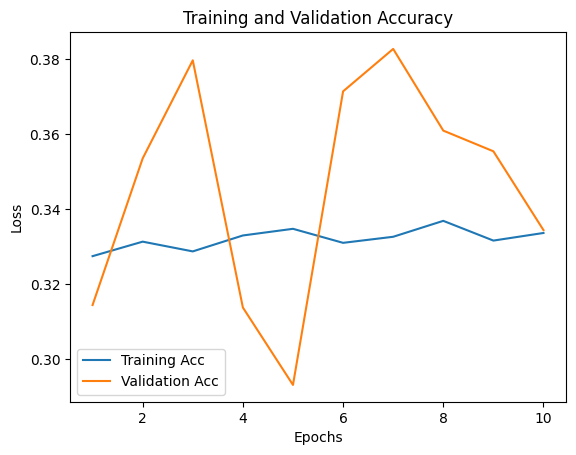

In [ ]:
history_baseline = model_baseline.fit(train_ds, validation_data=val_ds, epochs=10)

history_dict = history_baseline.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training Acc')
plt.plot(epochs, val_acc, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Bag of Words Baseline Model, multiclass output

Embeddings Model with 16 Embeddings

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
embedding_dim = 16

model = tf.keras.Sequential([
    layers.Embedding(10000, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4041 - loss: 1.5528 - val_accuracy: 0.5322 - val_loss: 1.2156
Epoch 2/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5125 - loss: 1.3072 - val_accuracy: 0.5938 - val_loss: 1.0818
Epoch 3/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5539 - loss: 1.1968 - val_accuracy: 0.6187 - val_loss: 1.0108
Epoch 4/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5903 - loss: 1.1072 - val_accuracy: 0.6130 - val_loss: 0.9962
Epoch 5/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6128 - loss: 1.0526 - val_accuracy: 0.6322 - val_loss: 0.9393
Epoch 6/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6390 - loss: 0.9950 - val_accuracy: 0.6789 - val_loss: 0.8757
Epoch 7/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6544 - loss: 0.9475 - val_accuracy: 0.6669 - val_loss: 0.8808
Epoch 8/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6651 - loss: 0.9137 - val

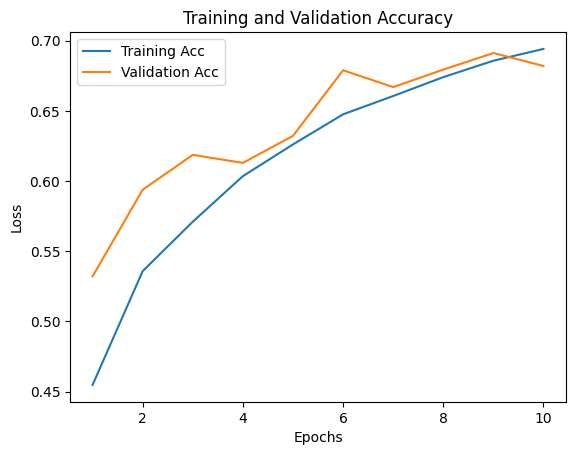

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training Acc')
plt.plot(epochs, val_acc, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Using Keras Tuner to find best Embedding Size, Dropout Rate, and Learning Rate

In [ ]:
!pip install keras_tuner
import keras_tuner as kt
import numpy as np

# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='val_accuracy',
verbose=1,
patience=5,
mode='max',
restore_best_weights=True)

#creating model to find best parameters
def build_model(hp):
  tf.keras.backend.clear_session()
  tf.random.set_seed(42)
  np.random.seed(42)

  model = tf.keras.Sequential()
  #adding first embedding layer while tuning embedding size
  hp_embedding_dim = hp.Int('embedding_dim', min_value=16, max_value=128, step=16)
  model.add(layers.Embedding(10000, hp_embedding_dim))
  #tuning dropout rate
  hp_dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
  model.add(layers.Dropout(hp_dropout_rate)) #dropout layer
  model.add(tf.keras.layers.GlobalAveragePooling1D()) #average poolying layer
  model.add(tf.keras.layers.Dropout(hp_dropout_rate)) #another dropout layer

  model.add(tf.keras.layers.Dense(units=7, activation='softmax'))

  #building and compiling while tuning learning rate
  model.build(input_shape=(None, 500))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',
    project_name='my_project'
)

tuner.search(train_ds, epochs=20, validation_data=(val_ds), callbacks=[early_stopping])
#getting best hyperparameters
best_model = tuner.get_best_models()[0]
best_model.summary()

Trial 5 Complete [00h 12m 59s]
val_accuracy: 0.7079368233680725

Best val_accuracy So Far: 0.731728196144104
Total elapsed time: 00h 33m 17s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 48)             │         480,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500, 48)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 48)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             343 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 480,343 (1.83 MB)

 Trainable params: 480,343 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.7015 - loss: 1.4245 - val_accuracy: 0.7275 - val_loss: 0.7624
Epoch 2/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7595 - loss: 0.6606 - val_accuracy: 0.7357 - val_loss: 0.7367
Epoch 3/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.7662 - loss: 0.6499 - val_accuracy: 0.7412 - val_loss: 0.7352
Epoch 4/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7685 - loss: 0.6398 - val_accuracy: 0.7403 - val_loss: 0.7465
Epoch 5/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.7689 - loss: 0.6457 - val_accuracy: 0.7349 - val_loss: 0.7283
Epoch 6/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.7711 - loss: 0.6353 - val_accuracy: 0.7373 - val_loss: 0.7472
Epoch 7/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.7782 - loss: 0.6171 - val_accuracy: 0.7375 - val_loss: 0.7285
Epoch 8/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.7772 - loss: 0.6214 - 

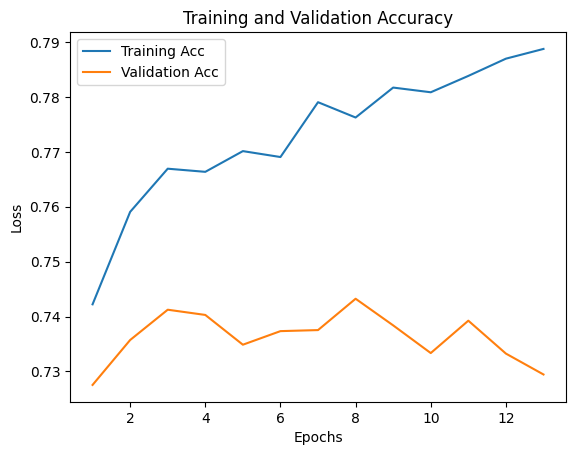

In [ ]:
history_best = best_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]
)

history_dict = history_best.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training Acc')
plt.plot(epochs, val_acc, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'embedding_dim': 48, 'dropout_rate': 0.2, 'learning_rate': 0.01}

Using best hyperparameters found above and tuning with additional hidden layers.

In [ ]:
tf.keras.backend.clear_session()
# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='val_accuracy',
verbose=1,
patience=5,
mode='max',
restore_best_weights=True)

#creating model to find best parameters
def build_better_model(hp):
  tf.keras.backend.clear_session()
  tf.random.set_seed(42)
  np.random.seed(42)

  model = tf.keras.Sequential()
  model.add(layers.Embedding(10000, 48))
  model.add(layers.Dropout(0.2))
  model.add(tf.keras.layers.GlobalAveragePooling1D())
  model.add(tf.keras.layers.Dropout(0.2))

  #tuning number of hidden layers as well as number of neurons within layers
  for i in range(hp.Int('num_layers', 1, 3)):
    model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(units=7, activation='softmax'))


  model.build(input_shape=(None, 500))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  return model

tuner2 = kt.RandomSearch(
    build_better_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',
    project_name='my_project2'
)

tuner2.search(train_ds, epochs=20, validation_data=(val_ds), callbacks=[early_stopping])
#getting best hyperparameters
best_model_2 = tuner2.get_best_models()[0]
best_model_2.summary()

Trial 5 Complete [00h 02m 19s]
val_accuracy: 0.5400646924972534

Best val_accuracy So Far: 0.7157403826713562
Total elapsed time: 00h 25m 30s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 48)             │         480,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500, 48)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 48)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          12,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 494,343 (1.89 MB)

 Trainable params: 494,343 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6232 - loss: 1.1148 - val_accuracy: 0.7000 - val_loss: 0.8428
Epoch 2/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6779 - loss: 0.8685 - val_accuracy: 0.6840 - val_loss: 0.9450
Epoch 3/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6933 - loss: 0.8408 - val_accuracy: 0.6844 - val_loss: 0.9359
Epoch 4/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7034 - loss: 0.8202 - val_accuracy: 0.6779 - val_loss: 0.8611
Epoch 5/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.6987 - loss: 0.8112 - val_accuracy: 0.6911 - val_loss: 0.8095
Epoch 6/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.6948 - loss: 0.8385 - val_accuracy: 0.7159 - val_loss: 0.8091
Epoch 7/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.6984 - loss: 0.8204 - val_accuracy: 0.6805 - val_loss: 0.8641
Epoch 8/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.7029 - loss: 0.8161 - 

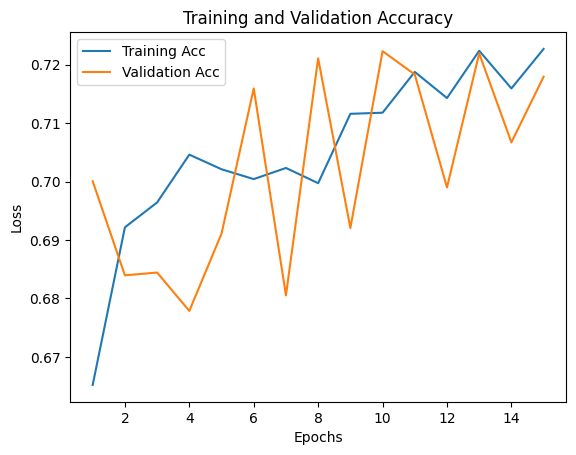

In [ ]:
history_best_2 = best_model_2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]
)

history_dict_2 = history_best_2.history
acc = history_dict_2['accuracy']
val_acc = history_dict_2['val_accuracy']
loss = history_dict_2['loss']
val_loss = history_dict_2['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training Acc')
plt.plot(epochs, val_acc, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Feature Engineering - combining stress/anxiety and depression/suicidal classes

In [ ]:
#tokenize and vectorize text
max_features = 10000
sequence_length = 500 #will pad sequences to length 500

vectorize_layer = layers.TextVectorization(max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

#adapting vectorize layer to X_train
vectorize_layer.adapt(X_train)

In [ ]:
#applying vectorization to train, test and val
X_train_vectorized = vectorize_layer(X_train)
X_test_vectorized = vectorize_layer(X_test)
X_val_vectorized = vectorize_layer(X_val)

# y_train = y_train.map(lambda x: int(x))
# y_test = y_test.map(lambda x: int(x))
# y_val = y_val.map(lambda x: int(x))

#change 5 to 0 and 6 to 2 in y_train
y_train_condensed = y_train.map(lambda x: 0 if x == 5 else x)
y_train_condensed = y_train_condensed.map(lambda x: 2 if x == 6 else x)
y_test_condensed = y_test.map(lambda x: 0 if x == 5 else x)
y_test_condensed = y_test_condensed.map(lambda x: 2 if x == 6 else x)
y_val_condensed = y_val.map(lambda x: 0 if x == 5 else x)
y_val_condensed = y_val_condensed.map(lambda x: 2 if x == 6 else x)

#combining train, test and val into datasets
train_cond = tf.data.Dataset.from_tensor_slices((X_train_vectorized, y_train_condensed))
test_cond = tf.data.Dataset.from_tensor_slices((X_test_vectorized, y_test_condensed))
val_cond = tf.data.Dataset.from_tensor_slices((X_val_vectorized, y_val_condensed))

#configuring dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_cond = train_cond.cache().prefetch(buffer_size=AUTOTUNE)
val_cond = val_cond.cache().prefetch(buffer_size=AUTOTUNE)
test_cond = test_cond.cache().prefetch(buffer_size=AUTOTUNE)

train_cond = train_cond.map(lambda x, y: (tf.cast(x, tf.float32), y))
train_cond = train_cond.batch(64)
val_cond = val_cond.map(lambda x, y: (tf.cast(x, tf.float32), y))
val_cond = val_cond.batch(64)
test_cond = test_cond.map(lambda x, y: (tf.cast(x, tf.float32), y))
test_cond = test_cond.batch(64)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
embedding_dim = 48

model_cond = tf.keras.Sequential([
    layers.Embedding(10000, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(7, activation='softmax')
])

model_cond.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5448 - loss: 1.1682 - val_accuracy: 0.7313 - val_loss: 0.8457
Epoch 2/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.6756 - loss: 0.8902 - val_accuracy: 0.7637 - val_loss: 0.6826
Epoch 3/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.7297 - loss: 0.7676 - val_accuracy: 0.7667 - val_loss: 0.6095
Epoch 4/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7564 - loss: 0.6891 - val_accuracy: 0.7817 - val_loss: 0.5726
Epoch 5/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7760 - loss: 0.6435 - val_accuracy: 0.7988 - val_loss: 0.5473
Epoch 6/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7944 - loss: 0.5962 - val_accuracy: 0.8080 - val_loss: 0.5271
Epoch 7/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7983 - loss: 0.5751 - val_accuracy: 0.8138 - val_loss: 0.5140
Epoch 8/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8105 - loss: 0.5488 - 

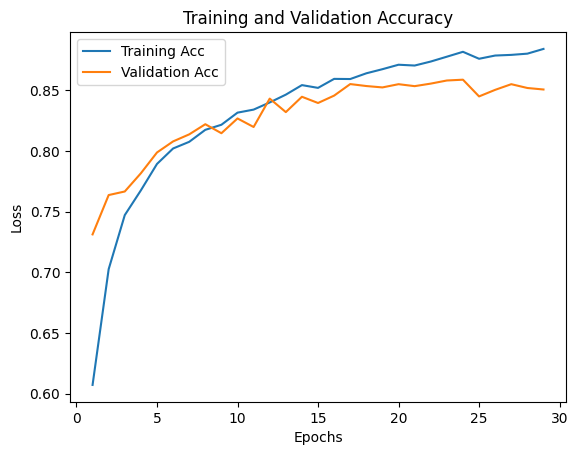

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_cond.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='val_accuracy',
verbose=1,
patience=5,
mode='max',
restore_best_weights=True)

history_cond = model_cond.fit(
    train_cond,
    validation_data=val_cond,
    epochs=50,
    callbacks=[early_stopping]
)

history_dict_3 = history_cond.history
acc = history_dict_3['accuracy']
val_acc = history_dict_3['val_accuracy']
loss = history_dict_3['loss']
val_loss = history_dict_3['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training Acc')
plt.plot(epochs, val_acc, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import f1_score, classification_report

#testing model on test data
y_test_pred = model_cond.predict(X_test_vectorized)
y_test_pred = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test_condensed, y_test_pred, average='weighted')
print(f"Test F1 Score: {test_f1}")
print("Test Classification Report:\n", classification_report(y_test_condensed, y_test_pred))

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test F1 Score: 0.846815750376934
Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.53      0.65      1289
           1       0.94      0.56      0.70       539
           2       0.85      0.94      0.89      5183
           3       0.86      0.93      0.89      3281
           4       0.93      0.37      0.53       217

    accuracy                           0.86     10509
   macro avg       0.88      0.67      0.73     10509
weighted avg       0.86      0.86      0.85     10509

